# Build a CNN Model with PyTorch for Image Classification

**Convolutional Neural Network(CNN)** is a deep learning algorithm that learns directly from data, eliminating the need for manual feature extraction.      
CNNs are particularly useful for the **image data** which helps in finding patterns in images to recognize objects.


In this project, we will build a **CNN model for image classification** where images will be classified into classes of `social security cards`, `driving licenses`, and `others`.  

We have used `PyTorch` for building the model which is different than other deep learning frameworks as it uses dynamic computational graphs.

![Architecture Diagram](Architecture_Diagram.png)


Aim
- To understand the working of CNN
- To build a Convolutional Neural Network model to classify images into different classes in PyTorch

Tech Stack
- Language: Python
- Libraries: pytorch, pandas, matplotlib, numpy, opnecv_python_headless, torchvision

Data Description        
Dataset used in this project are images of driving license, social security, and others
categorized into respective categories. The images are of different shapes and sizes
which are preprocessed before modeling.

Approach
- Data Loading
- Data Preprocessing
    - Resizing and scaling of the images
    - Encoding of the class labels
- Model Building and Training
    - CNN model building in PyTorch

In [57]:
#Importing Necessary files to read Images
import pandas as pd
import numpy as np

import os
import cv2

import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
import torch.utils.data as Data
from torch import Tensor
from torch.autograd import Variable

from torch.utils.data import TensorDataset
from sklearn.preprocessing import LabelEncoder


from torchvision.datasets import ImageFolder

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


In [58]:
## Printing random images from the dataset
Training_folder="data/Training_data"
os.listdir(Training_folder)

['others', 'social_security', 'driving_license']

In [59]:
ImageFolder(Training_folder)

Dataset ImageFolder
    Number of datapoints: 600
    Root location: data/Training_data

In [60]:
for root, dirs, files in os.walk(Training_folder):
    for file in files:
        if file == '.DS_Store':
            os.remove(os.path.join(root, file))

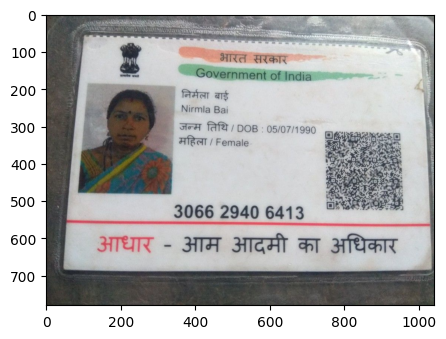

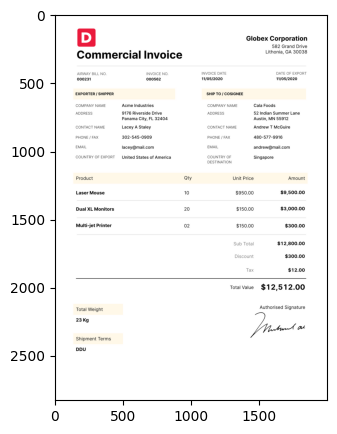

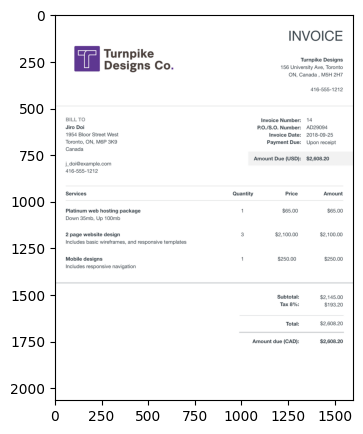

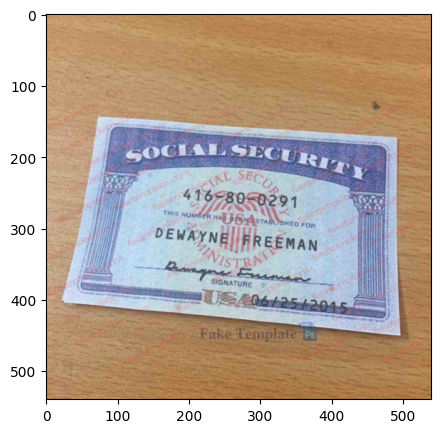

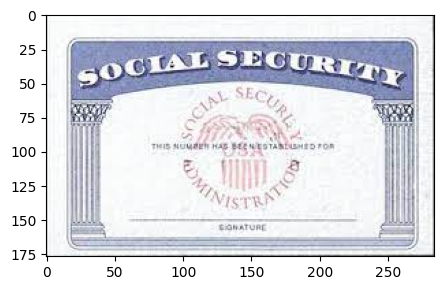

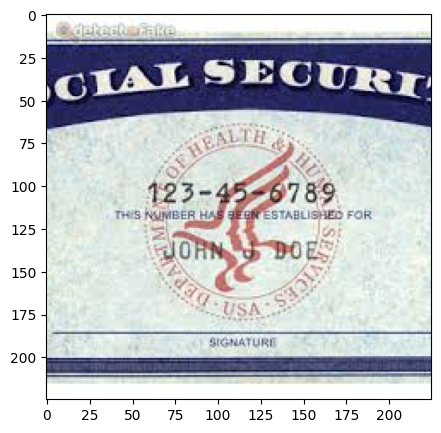

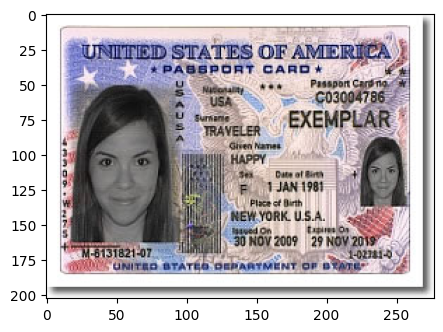

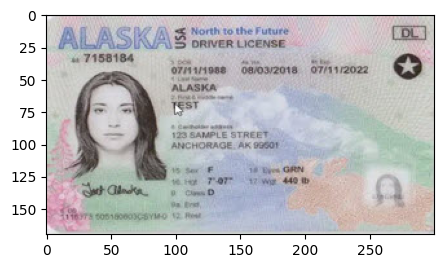

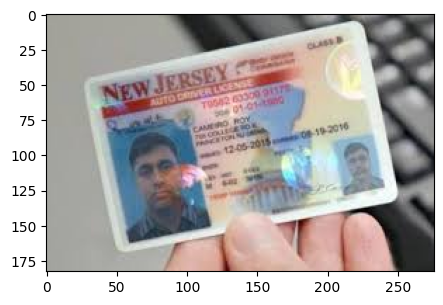

In [61]:
for path in os.listdir(Training_folder):
    for i in range(3):
        temp_path = Training_folder+"/"+path
        file = random.choice(os.listdir(temp_path))
        image_path= os.path.join(temp_path, file)
        img=mpimg.imread(image_path)
        plt.figure(figsize=(5,5))
        plt.imshow(img)

In [62]:
#Setting the Image dimension and source folder for loading the dataset
Train_folder='Data/Training_data'
Test_folder='Data/Testing_Data'
IMG_WIDTH=200
IMG_HEIGHT=200

In [63]:
# Création des données d'image et des étiquettes à partir des images
def create_dataset(Train_folder):
    img_data_array=[]
    class_name=[]
    classes = {'driving_license': [1,0,0], 'others': [0,1,0], 'social_security': [0,0,1]}
    for PATH in classes:
        for file in os.listdir(os.path.join(Train_folder, PATH)):
            image_path = os.path.join(Train_folder, PATH, file) 
            image = cv2.imread(image_path, cv2.COLOR_BGR2RGB) # reading the image, BGR to RGB means Blue, Green, Red to Red, Green, Blue, it is used to read all the images in the same format
            image = cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH), interpolation=cv2.INTER_AREA) # resizing the image. interpolation is the method of resizing
            image = np.array(image) # converting the image to array
            image = image.astype('float64') # converting the image to float
            # image /= 255 # Normalisation, we chose 255 because the maximum value of a pixel is 255
            if len(image.shape) == 3: # if the image is colored, because the shape of the image is 3D
                img_data_array.append(np.array(image).reshape([3, IMG_HEIGHT, IMG_WIDTH])) # reshaping the image to 3D because the image is colored, 3D means 3 channels
                class_name.append(classes[PATH]) # appending the class name
    return img_data_array, class_name # returning the image data and the class name as a list

In [64]:
for root, dirs, files in os.walk(Test_folder):
    for file in files:
        if file == '.DS_Store':
            os.remove(os.path.join(root, file))

In [65]:
# extract the image array and class name for training data
Train_img_data, train_class_name = create_dataset(Train_folder)

# extract the image array and class name for testing data
Test_img_data, test_class_name =create_dataset(Test_folder)

libpng warning: iCCP: known incorrect sRGB profile


In [66]:
train_class_name[0]

[1, 0, 0]

In [67]:
Train_img_data[0]

array([[[ 30.,  34.,  50., ...,  67.,  51.,  49.],
        [ 67.,  50.,  48., ...,  64.,  71.,  55.],
        [ 64.,  71.,  56., ...,  67.,  76.,  82.],
        ...,
        [197., 206., 182., ..., 108., 130., 142.],
        [102.,  98., 123., ...,  79., 133., 122.],
        [ 81., 108.,  96., ..., 202., 204., 194.]],

       [[202., 206., 190., ..., 111., 133., 145.],
        [100.,  96., 121., ...,  77., 147., 136.],
        [ 77., 148., 134., ..., 193., 187., 201.],
        ...,
        [187., 175., 184., ..., 192., 189., 200.],
        [192., 187., 205., ..., 101., 117., 129.],
        [ 26.,  39.,  53., ..., 195., 176., 180.]],

       [[191., 174., 182., ..., 201., 196., 203.],
        [196., 189., 204., ..., 101., 117., 129.],
        [ 27.,  40.,  54., ..., 196., 181., 185.],
        ...,
        [  4.,  11.,  26., ...,  64.,  32.,  46.],
        [ 65.,  32.,  46., ...,  71.,  90.,  56.],
        [ 70.,  89.,  58., ...,  68.,  87., 108.]]])

## Implementing a CNN in PyTorch


### convert numpy into tensor

In [68]:
# Convertir les images en Tensors (float32 pour les images)
train_images_tensor = torch.tensor(np.array(Train_img_data), dtype=torch.float32)
test_images_tensor = torch.tensor(np.array(Test_img_data), dtype=torch.float32)

# Convertir les labels en Tensors (long pour classification)
train_labels_tensor = torch.tensor(np.array(train_class_name), dtype=torch.long)
test_labels_tensor = torch.tensor(np.array(test_class_name), dtype=torch.long)

### data loader

In [69]:
torch_dataset_train = TensorDataset(train_images_tensor, train_labels_tensor)
torch_dataset_test = TensorDataset(test_images_tensor, test_labels_tensor)

In [70]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((200, 200)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor()
])

In [71]:
train_dataset = ImageFolder("data/Training_data", transform=transform)
train_loader = Data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataset = ImageFolder("data/Testing_Data", transform=transform)
test_loader = Data.DataLoader(test_dataset, batch_size=32, shuffle=False)

In [72]:
dataiter = iter(train_loader) # iter is used to iterate over the data
images = next(dataiter) # next is used to get the next data
images[0].shape

torch.Size([32, 3, 200, 200])

### Model 1

In [73]:
"""class CNNNet(nn.Module):   
    def __init__(self):
        super(CNNNet, self).__init__()

        self.cnn_layers = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2)),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride= 2),
            nn.Conv2d(16, 3, kernel_size=(50, 50), stride=(1, 1)),
            nn.MaxPool2d(kernel_size=1, stride=1, padding=0, ceil_mode=False)
        )   

        self.linear_layers = nn.Sequential(
            nn.Linear(3, 3) # 3 because we have 3 classes
        )
        # Defining the forward pass    
    def forward(self, x):
        x = self.cnn_layers(x)
        print(f"Après CNN : {x.shape}")  # (batch_size, num_channels, H, W)
        x = x.view(x.size(0), -1)  # Aplatissement
        print(f"Après Flatten : {x.shape}")  # (batch_size, flattened_size)
        x = self.linear_layers(x)
        return x
"""

'class CNNNet(nn.Module):   \n    def __init__(self):\n        super(CNNNet, self).__init__()\n\n        self.cnn_layers = nn.Sequential(\n            nn.Conv2d(3, 16, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2)),\n            nn.ReLU(),\n            nn.MaxPool2d(kernel_size=2, stride= 2),\n            nn.Conv2d(16, 3, kernel_size=(50, 50), stride=(1, 1)),\n            nn.MaxPool2d(kernel_size=1, stride=1, padding=0, ceil_mode=False)\n        )   \n\n        self.linear_layers = nn.Sequential(\n            nn.Linear(3, 3) # 3 because we have 3 classes\n        )\n        # Defining the forward pass    \n    def forward(self, x):\n        x = self.cnn_layers(x)\n        print(f"Après CNN : {x.shape}")  # (batch_size, num_channels, H, W)\n        x = x.view(x.size(0), -1)  # Aplatissement\n        print(f"Après Flatten : {x.shape}")  # (batch_size, flattened_size)\n        x = self.linear_layers(x)\n        return x\n'

### Define the optimizer and loss function 


In [74]:
""""
# defining the model
model = CNNNet()

# defining the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.0001)


# defining the loss function
criterion = nn.CrossEntropyLoss() # when we have multiple classes, we use CrossEntropyLoss

# checking if GPU is available
print(torch.cuda.is_available())
if torch.cuda.is_available():
    model = model.to("cuda")
    criterion = criterion.to("cuda")
    
print(model)
"""

'"\n# defining the model\nmodel = CNNNet()\n\n# defining the optimizer\noptimizer = optim.SGD(model.parameters(), lr=0.0001)\n\n\n# defining the loss function\ncriterion = nn.CrossEntropyLoss() # when we have multiple classes, we use CrossEntropyLoss\n\n# checking if GPU is available\nprint(torch.cuda.is_available())\nif torch.cuda.is_available():\n    model = model.to("cuda")\n    criterion = criterion.to("cuda")\n    \nprint(model)\n'

## Train the model

In [75]:
"""
#train this model for 10 epochs
for i in range(10):

  running_loss = 0
  model.train()
  for images, labels in train_loader:
      if torch.cuda.is_available():
          images = images.to("cuda")
          labels = labels.to("cuda").long()  # Convertir labels en `long`
  
      # Training pass
      optimizer.zero_grad()
      
      output = model(images)

      print(f"Output shape: {output.shape}")  # Doit être (batch_size, num_classes)
      print(f"Labels shape: {labels.shape}")  # Doit être (batch_size,)
      print(f"Output dtype: {output.dtype}")  # Doit être torch.float32
      print(f"Labels dtype: {labels.dtype}")  # Doit être torch.int64
      labels = labels.argmax(dim=1)  # Convertit one-hot en indices de classe

      loss = criterion(output, labels)
      
      #This is where the model learns by backpropagating
      loss.backward()
      
      #And optimizes its weights here
      optimizer.step()
      
      running_loss += loss.item()
  else:
      print("Epoch {} - Training loss: {}".format(i+1, running_loss/len(train_loader)))"
"""

'\n#train this model for 10 epochs\nfor i in range(10):\n\n  running_loss = 0\n  model.train()\n  for images, labels in train_loader:\n      if torch.cuda.is_available():\n          images = images.to("cuda")\n          labels = labels.to("cuda").long()  # Convertir labels en `long`\n  \n      # Training pass\n      optimizer.zero_grad()\n      \n      output = model(images)\n\n      print(f"Output shape: {output.shape}")  # Doit être (batch_size, num_classes)\n      print(f"Labels shape: {labels.shape}")  # Doit être (batch_size,)\n      print(f"Output dtype: {output.dtype}")  # Doit être torch.float32\n      print(f"Labels dtype: {labels.dtype}")  # Doit être torch.int64\n      labels = labels.argmax(dim=1)  # Convertit one-hot en indices de classe\n\n      loss = criterion(output, labels)\n      \n      #This is where the model learns by backpropagating\n      loss.backward()\n      \n      #And optimizes its weights here\n      optimizer.step()\n      \n      running_loss += loss.i

## Prediction

In [76]:
""""
y_pred_list = []
y_true_list = []
with torch.no_grad():
    for x_batch, y_batch in test_loader:
        x_batch, y_batch = x_batch.to(), y_batch.to()
        y_test_pred = model(x_batch)
        print(y_test_pred)
        _, y_pred_tag = torch.max(y_test_pred, dim = 1)
        y_pred_list.extend(y_pred_tag.cpu().numpy())
        y_true_list.extend(y_batch.cpu().numpy())"
"""

'"\ny_pred_list = []\ny_true_list = []\nwith torch.no_grad():\n    for x_batch, y_batch in test_loader:\n        x_batch, y_batch = x_batch.to(), y_batch.to()\n        y_test_pred = model(x_batch)\n        print(y_test_pred)\n        _, y_pred_tag = torch.max(y_test_pred, dim = 1)\n        y_pred_list.extend(y_pred_tag.cpu().numpy())\n        y_true_list.extend(y_batch.cpu().numpy())"\n'

In [77]:
""""
#y_test
y_true_list_max = [m.argmax() for m in y_true_list]""" 

'"\n#y_test\ny_true_list_max = [m.argmax() for m in y_true_list]'

## Accuracy of model


In [78]:
""" correct_count, all_count = 0, 0
for i in range(len(y_pred_list)):
    if(y_pred_list[i] == y_true_list_max[i]):
      correct_count += 1
    all_count += 1
print("\nModel Accuracy =", (correct_count/all_count))"""

' correct_count, all_count = 0, 0\nfor i in range(len(y_pred_list)):\n    if(y_pred_list[i] == y_true_list_max[i]):\n      correct_count += 1\n    all_count += 1\nprint("\nModel Accuracy =", (correct_count/all_count))'

In [79]:
"""from PIL import Image
import torch
import torchvision.transforms as transforms
import torch.nn.functional as F

# Charger le modèle
model = CNNNet()
model.load_state_dict(torch.load("model.pt", map_location=torch.device("cpu")))
model.eval()

# Prétraitement (doit être le même qu’à l'entraînement)
transform = transforms.Compose([
    transforms.Resize((200, 200)),
    transforms.ToTensor()
])

# Charger une image de test
img_path = "data/Testing_Data/social_security/51.jpg"  # remplace avec une vraie image
image = Image.open(img_path).convert("RGB")
input_tensor = transform(image).unsqueeze(0)

# Prédiction
with torch.no_grad():
    output = model(input_tensor)
    probs = F.softmax(output, dim=1)
    predicted = torch.argmax(probs, 1).item()

# Mapping des classes
label_dict = {0: "Driving License", 1: "Others", 2: "Social Security"}
print("Prédiction :", label_dict[predicted])
print("Probabilités :", probs.numpy()) """


'from PIL import Image\nimport torch\nimport torchvision.transforms as transforms\nimport torch.nn.functional as F\n\n# Charger le modèle\nmodel = CNNNet()\nmodel.load_state_dict(torch.load("model.pt", map_location=torch.device("cpu")))\nmodel.eval()\n\n# Prétraitement (doit être le même qu’à l\'entraînement)\ntransform = transforms.Compose([\n    transforms.Resize((200, 200)),\n    transforms.ToTensor()\n])\n\n# Charger une image de test\nimg_path = "data/Testing_Data/social_security/51.jpg"  # remplace avec une vraie image\nimage = Image.open(img_path).convert("RGB")\ninput_tensor = transform(image).unsqueeze(0)\n\n# Prédiction\nwith torch.no_grad():\n    output = model(input_tensor)\n    probs = F.softmax(output, dim=1)\n    predicted = torch.argmax(probs, 1).item()\n\n# Mapping des classes\nlabel_dict = {0: "Driving License", 1: "Others", 2: "Social Security"}\nprint("Prédiction :", label_dict[predicted])\nprint("Probabilités :", probs.numpy()) '

In [80]:
"""for cls in os.listdir("data/Testing_Data"):
    folder = os.path.join("data/Testing_Data", cls)
    for img_name in os.listdir(folder)[:5]:  # tester 5 images par classe
        path = os.path.join(folder, img_name)
        image = Image.open(path).convert("RGB")
        tensor = transform(image).unsqueeze(0)
        with torch.no_grad():
            out = model(tensor)
            prob = F.softmax(out, dim=1)
            pred = torch.argmax(prob, 1).item()
        print(f"{img_name} ({cls}) → {label_dict[pred]} | {prob.numpy()}")"""


'for cls in os.listdir("data/Testing_Data"):\n    folder = os.path.join("data/Testing_Data", cls)\n    for img_name in os.listdir(folder)[:5]:  # tester 5 images par classe\n        path = os.path.join(folder, img_name)\n        image = Image.open(path).convert("RGB")\n        tensor = transform(image).unsqueeze(0)\n        with torch.no_grad():\n            out = model(tensor)\n            prob = F.softmax(out, dim=1)\n            pred = torch.argmax(prob, 1).item()\n        print(f"{img_name} ({cls}) → {label_dict[pred]} | {prob.numpy()}")'

The model outputs exactly the same prediction pattern for all images, with a slightly higher probability for class 0 (Driving License), even for images from the other classes.

Diagnosis: The model hasn’t learned anything.

Evidence:
- All predictions = Driving License
- Probabilities ≈ [0.5, 0.25, 0.25], regardless of the input image
- The output shape from the CNN is always [1, 3, 1, 1] ⇒ no discriminative information is being extracted from the image.

## New CNN

### Class distrbution

In [81]:
from collections import Counter
import os

base_dir = "data/Training_data"
count = {cls: len(os.listdir(os.path.join(base_dir, cls))) for cls in os.listdir(base_dir)}
print(count)


{'others': 200, 'social_security': 200, 'driving_license': 200}


### Model 2

In [82]:
import torch.nn.functional as F

class CNNNet(nn.Module):
    def __init__(self):
        super(CNNNet, self).__init__()

        self.cnn_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # 100x100

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # 50x50

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # 25x25

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)   # 12x12
        )

        self.linear_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(256 * 12 * 12, 256),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(256, 3)
        )

    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x


### Define the optimizer and loss function 


In [83]:
# defining the model
model2 = CNNNet()

# defining the optimizer
#optimizer = optim.SGD(model2.parameters(), lr=0.0001)
optimizer = torch.optim.Adam(model2.parameters(), lr=1e-4)

# defining the loss function
criterion = nn.CrossEntropyLoss() # when we have multiple classes, we use CrossEntropyLoss

# checking if GPU is available
print(torch.cuda.is_available())
if torch.cuda.is_available():
    model2 = model2.to("cuda")
    criterion = criterion.to("cuda")
    
print(model2)

False
CNNNet(
  (cnn_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=

In [84]:
dummy = torch.zeros(1, 3, 200, 200)
print(model2(dummy).shape)  # doit être [1, 3]


torch.Size([1, 3])


In [85]:
for images, labels in train_loader:
    print("⛳ batch input shape:", images.shape)
    break


⛳ batch input shape: torch.Size([32, 3, 200, 200])


/usr/local/lib/python3.11/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


### Train the new model

In [86]:
from tqdm import tqdm

for epoch in range(20):

    running_loss = 0
    model2.train()
    for images, labels in train_loader:
        
        if torch.cuda.is_available():
            images = images.to("cuda")
            labels = labels.to("cuda").long()

        optimizer.zero_grad()

        output = model2(images)

        #print(f"Output shape: {output.shape}")  # (batch_size, num_classes)
        #print(f"Labels shape: {labels.shape}")  # (batch_size,)
        #print(f"Output dtype: {output.dtype}")
        #print(f"Labels dtype: {labels.dtype}")

        loss = criterion(output, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1} - Training loss: {running_loss / len(train_loader):.4f}")

Epoch 1 - Training loss: 1.3576
Epoch 2 - Training loss: 0.4387
Epoch 3 - Training loss: 0.3031
Epoch 4 - Training loss: 0.2293
Epoch 5 - Training loss: 0.1812
Epoch 6 - Training loss: 0.1590
Epoch 7 - Training loss: 0.1313
Epoch 8 - Training loss: 0.0974
Epoch 9 - Training loss: 0.0856
Epoch 10 - Training loss: 0.0873
Epoch 11 - Training loss: 0.1024
Epoch 12 - Training loss: 0.1448
Epoch 13 - Training loss: 0.0796
Epoch 14 - Training loss: 0.0575
Epoch 15 - Training loss: 0.0717
Epoch 16 - Training loss: 0.0478
Epoch 17 - Training loss: 0.0273
Epoch 18 - Training loss: 0.0379
Epoch 19 - Training loss: 0.0415
Epoch 20 - Training loss: 0.0420


In [87]:
torch.save(model2.state_dict(), "model2.pt")

### Prediction


prédiction batch sur le test_loader

In [88]:
# 🔁 Ce sont les classes selon ImageFolder
class_names = test_dataset.classes
print("Classes utilisées :", class_names)  # ['driving_license', 'others', 'social_security']

# 🔍 Génère y_true et y_pred
y_true_list = []
y_pred_list = []

model2.eval()
with torch.no_grad():
    for x_batch, y_batch in test_loader:
        if torch.cuda.is_available():
            x_batch = x_batch.to("cuda")
            y_batch = y_batch.to("cuda")

        y_test_pred = model2(x_batch)
        _, y_pred_tag = torch.max(y_test_pred, dim=1)

        y_pred_list.extend(y_pred_tag.cpu().numpy())
        y_true_list.extend(y_batch.cpu().numpy())

Classes utilisées : ['driving_license', 'others', 'social_security']


prédiction image par image pour visualiser les erreurs

In [89]:
idx_to_class = {v: k for k, v in test_dataset.class_to_idx.items()}

# 🔍 Test image par image AVEC classes correctes
print("🧪 Prédictions sur 5 images par classe :\n")
model2.eval()
with torch.no_grad():
    for label_idx, class_name in enumerate(test_dataset.classes):
        class_folder = os.path.join("data/Testing_Data", class_name)
        images = os.listdir(class_folder)[:5]

        for img_name in images:
            img_path = os.path.join(class_folder, img_name)
            image = Image.open(img_path).convert("RGB")
            input_tensor = transform(image).unsqueeze(0)

            if torch.cuda.is_available():
                input_tensor = input_tensor.to("cuda")
                model2 = model2.to("cuda")

            output = model2(input_tensor)
            prob = F.softmax(output, dim=1)
            pred_idx = torch.argmax(prob, dim=1).item()
            pred_class = idx_to_class[pred_idx]

            print(f"{img_name} (🟩 True: {class_name}) → 🧠 Pred: {pred_class} | {prob.cpu().numpy()}")

🧪 Prédictions sur 5 images par classe :

48.png (🟩 True: driving_license) → 🧠 Pred: driving_license | [[0.5929009  0.23437381 0.17272536]]
49.jpg (🟩 True: driving_license) → 🧠 Pred: driving_license | [[0.9525282  0.00870003 0.03877183]]
31.jpeg (🟩 True: driving_license) → 🧠 Pred: driving_license | [[0.94538444 0.02939632 0.02521925]]
8.jpg (🟩 True: driving_license) → 🧠 Pred: driving_license | [[9.9710721e-01 2.6645863e-03 2.2817675e-04]]
9.jpg (🟩 True: driving_license) → 🧠 Pred: driving_license | [[9.991072e-01 3.443248e-04 5.484176e-04]]
149.png (🟩 True: others) → 🧠 Pred: others | [[4.5168255e-03 9.9522156e-01 2.6163791e-04]]
148.jpg (🟩 True: others) → 🧠 Pred: others | [[1.0193161e-03 9.9897528e-01 5.5117503e-06]]
101.jpg (🟩 True: others) → 🧠 Pred: others | [[9.3764719e-03 9.9062157e-01 1.9887989e-06]]
115.jpg (🟩 True: others) → 🧠 Pred: others | [[6.2566524e-04 9.9937421e-01 1.2514170e-07]]
129.png (🟩 True: others) → 🧠 Pred: others | [[1.8086849e-04 9.9977809e-01 4.0945786e-05]]
63.jp

matrice de confusion pour voir ce que le modèle confond 

In [90]:
# Tester le nom du fichier de test_loader
for i, (img, label) in enumerate(test_loader):
    print(f"Batch {i}, label : {label}")
    break


Batch 0, label : tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])


In [91]:
import collections
label_counts = collections.Counter()

for _, label_batch in test_loader:
    for label in label_batch:
        label_counts[int(label)] += 1

print("Labels dans test_loader :", label_counts)


Labels dans test_loader : Counter({0: 50, 1: 50, 2: 50})


In [92]:
#y_true_list = [np.argmax(y) for y in y_true_list]

In [93]:
print("Classes détectées :", test_dataset.classes)
print("Indices associés :", test_dataset.class_to_idx)

Classes détectées : ['driving_license', 'others', 'social_security']
Indices associés : {'driving_license': 0, 'others': 1, 'social_security': 2}


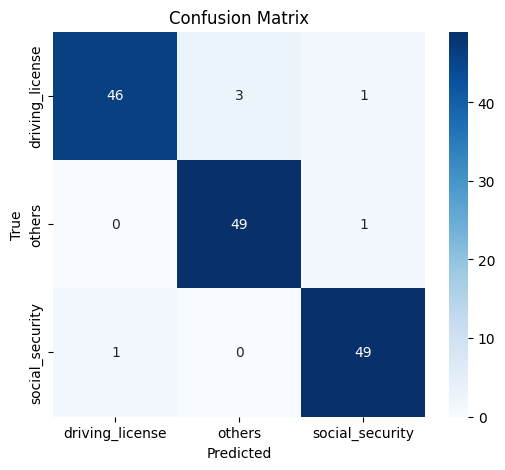

In [94]:
cm = confusion_matrix(y_true_list, y_pred_list)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [95]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_true_list, y_pred_list,
                            target_names=["Driving License", "Others", "Social Security"]))


                 precision    recall  f1-score   support

Driving License       0.98      0.92      0.95        50
         Others       0.94      0.98      0.96        50
Social Security       0.96      0.98      0.97        50

       accuracy                           0.96       150
      macro avg       0.96      0.96      0.96       150
   weighted avg       0.96      0.96      0.96       150

